## Q1. Prove the algorithm generates output as bernoulli distribution.
Let P be the probability of getting output 1 from the given Algorithm.Then, we can get output as 1 in three ways.
\
One way is getting C1=1 and C2=1.
\
Second one is C1 = 1 and C2=0 and getting output 1 with P probability.
\
The last case is C1=0 and C2=0 and getting output 1 with probability P
\
So,
\
\

$P = \frac{c_y}{c_y+c_x}*(p_y+(1-p_y)*P)+\frac{c_x}{c_y+c_x}*((1-p_x)*P)$\
$c_xP+c_yP = c_yp_y+c_yP-c_yp_yP+c_xP-c_xp_xP$\
$0 = c_yp_y-c_yp_yP-c_xp_xP$\
$(c_yp_y+c_xp_x)P = c_yp_y$\
$P = \frac{c_yp_y}{c_yp_y+c_xp_x}$
\
\
Let k be the number of iterations algorithm takes to give the output.So,PDF is
\
$P_k = P(1-P)^k$\
Expectation or average number of iteration of the above geometric PDF is $\frac{1}{P}$\
$E[k] = 1+\frac{p_xc_x}{p_yc_y}$

## Q2. Sample from p-Dimensional Sphere.

In [21]:
# Please use Pkg.add("") to add the following modules.
using Plots
using Distributions
using LinearAlgebra
using QuadGK

In [5]:
# For sampling
function dimsphere_sampler(p)
    while true
        U = rand(Uniform(-1,1), p)
        z = zeros(p)
        D = norm(U-z)
        if D<1
            return U
        end
    end
end

dimsphere_sampler (generic function with 1 method)

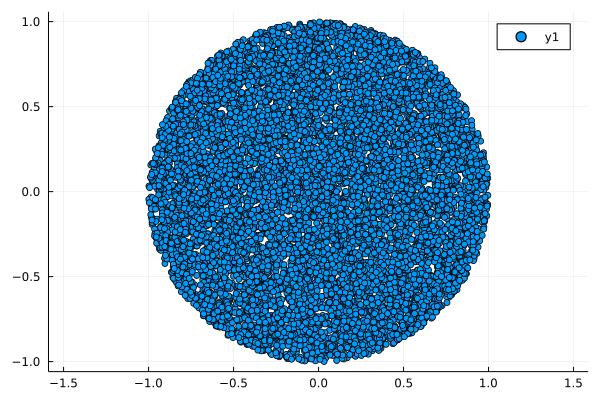

For p=2


In [56]:
# For creating a distribution using self Made and comparing it with InBuilt Poisson Distribution
function dimsphere_plot(p, iterations=2000)
    if p==2
        X = []
        Y = []
        for j=0:iterations
            A = dimsphere_sampler(p)
            push!(X,A[1])
            push!(Y,A[2])
        end
        println("For p=",p)
        display(plot(X,Y, seriestype = :scatter, aspect_ratio = :equal))
    elseif p==3
        X = []
        Y = []
        Z = []
        for j=0:iterations
            A = dimsphere_sampler(p)
            push!(X,A[1])
            push!(Y,A[2])
            push!(Z,A[3])
        end
        println("For p=",p)
        display(plot(X,Y,Z, seriestype = :scatter, aspect_ratio = :equal))
    else
        X = []
        for j=0:iterations
            push!(X,dimsphere_sampler(p))
        end
        println("For p=",p)
        display(X)
    end
end

# Change the value of (p,iterations) from here. Graphs are visible for p=2 and p=3 only
dimsphere_plot(2,10000) 


If we will increase the value of p, chance of getting point inside the p-dimensional sphere decrease. So, we have to work for more number of iterations.

### Q3 Sample from Truncated Normal Distribution

Created a Truncated Sampler which uses a Standard Normal Distro as a proposal.What i am doing is removing all the Y sampled which doesn't lies in the range of -a< x < a and repeating it till i get a Y in the required range. Now simply using AR. For calculating the denominator part i am using *quadgk* integrator. 

In [40]:
function tr_sampler(a)
    f(x) = exp(-(x^2)/2)/sqrt(2*pi);
    integral, err = quadgk(f,-a,a);
    c = 1/integral
    while true
        U = rand()
        Y = rand(Normal())
        while(f(Y)<f(a))
            Y = rand(Normal())
        end
        if(U<(1/c))
            return Y
        end
    end
end

tr_sampler (generic function with 1 method)

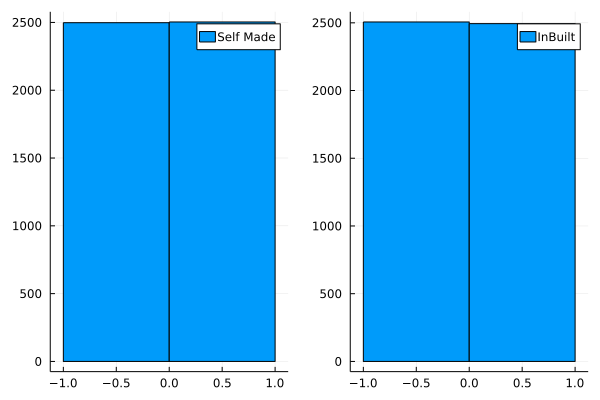

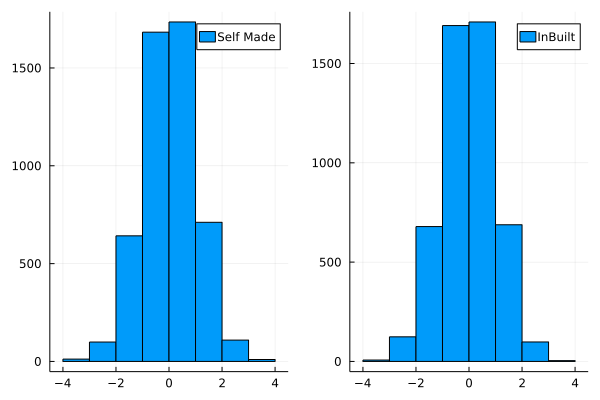

For a=1

Mean for Self Made Binomial: -0.0006062237883427907
Actual mean value :-0.004604651827261845
Variance for Self Made Binomial: 0.29191151001765403
Actual variance value :0.2903025121811065

For a=4

Mean for Self Made Binomial: 0.02603518997679818
Actual mean value :-0.01377610719322492
Variance for Self Made Binomial: 1.0072228831333088
Actual variance value :1.0082508660826988



In [54]:
function tr_compare(a, iterations=5000)
    X = []
    for j=0:iterations
        push!(X,tr_sampler(a))
    end

    Y = rand(TruncatedNormal(0,1,-a,a),iterations)
    display(plot(histogram(X,bins = 2*a, label="Self Made"),histogram(Y,bins = 2*a, label="InBuilt"), layout = 2))
    println("For a=",a)
    println()
    println("Mean for Self Made Binomial: ",mean(X))
    println("Actual mean value :", mean(Y))
    println("Variance for Self Made Binomial: ",var(X))
    println("Actual variance value :", var(Y))
    println()
    
end
tr_compare(1)
tr_compare(4)

What i can observe is that for a=4, the distribution is something like a bell curve
\
But for a=1, we are getting a somewhat uniform distribution around 0.